# 04_Clustering

In [1]:
#%pwd

## Import modules

In [2]:
import os, glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import modules

In [3]:
df_name = '../data/UMAP/06_df_umap2d_MinDist_0.4_Nneighbors_25.csv'

In [4]:
# read csv file
df_feature = pd.read_csv(df_name, header=0, index_col='Unnamed: 0')
df_feature.head()

FSC-A     SSC-A  BUV395-A CD45  BV421-A CD19  BV480-A CD11c  \
0  1.159270 -0.310758       0.554464     -0.885931      -0.586110   
1  0.552696 -0.554620       0.404978      0.982606      -0.373935   
2  0.144962  0.620933       0.005066     -0.963884       1.158539   
3  0.962977  0.602806       0.328595     -2.117880       0.896117   
4 -0.051882 -0.462053      -0.048359      0.576256       0.517374   

   BV605-A CD115  BV650-A CD11b  BV711-A Ly6G  BV786-A Ly6C  BB515-A NK1_1  \
0      -0.210948       0.201151     -0.438512      1.778846       3.955103   
1      -0.602841      -0.593752     -0.702718     -0.617406      -0.481105   
2      -0.003496       1.895770      0.803198     -0.668707      -0.396832   
3       0.271379       2.600598      1.414766      2.025932      -0.308440   
4      -0.584280      -0.640670     -0.470462     -0.744477      -0.417993   

   BB700-A SIRPa  APC-A Siglec F  R718-A MHCII  APC-Cy7-A CD3e  \
0      -0.560177       -0.046185     -1.057001       -1.017908   
1      -0.570641       -0.088153      0.449859       -0.656413   
2       1.737835       -0.626328     -1.184978       -0.344771   
3       2.065333       -0.439502     -1.237550       -0.867201   
4      -0.562773       -0.143216      0.218212       -0.174368   

   PE-Cy7-A FceR1    UMAP_1     UMAP_2  
0       -0.743438  7.688066  -6.372326  
1       -0.541607  6.353627  16.558071  
2        0.481023 -3.882151   4.113312  
3        0.836649 -2.186766   1.211595  
4       -0.650930  9.018615  12.735517

In [5]:
df_col = pd.read_csv('../data/df_sc.csv', header=0)
df_col = df_col[['sample_id', 'group', 'celltype']]
df_col.head()

sample_id       group   celltype
0  231218_Symphony_016_ACK_231212_2311218_ACK.fcs  ACK_Frozen   NK cells
1  231218_Symphony_016_ACK_231212_2311218_ACK.fcs  ACK_Frozen    B cells
2  231218_Symphony_016_ACK_231212_2311218_ACK.fcs  ACK_Frozen  Monocytes
3  231218_Symphony_016_ACK_231212_2311218_ACK.fcs  ACK_Frozen  Monocytes
4  231218_Symphony_016_ACK_231212_2311218_ACK.fcs  ACK_Frozen    B cells

## Data shaping

In [6]:
df_col = df_col.fillna('CD45+')
df_col

sample_id            group  \
0       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
1       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
2       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
3       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
4       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
...                                                ...              ...   
936523    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936524    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936525    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936526    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936527    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   

         celltype  
0        NK cells  
1         B cells  
2       Monocytes  
3       Monocytes  
4         B cells  
...           ...  
936523    T cells  
936524    B cells  
936525      CD45+  
936526    B cells  
936527  Monocytes  

[936528 rows x 3 columns]

In [7]:
dir_result = '../data/Clustering/'
os.mkdir(dir_result)

In [8]:
df = pd.merge(df_col, df_feature, left_index=True, right_index=True)
df.head()

sample_id       group   celltype  \
0  231218_Symphony_016_ACK_231212_2311218_ACK.fcs  ACK_Frozen   NK cells   
1  231218_Symphony_016_ACK_231212_2311218_ACK.fcs  ACK_Frozen    B cells   
2  231218_Symphony_016_ACK_231212_2311218_ACK.fcs  ACK_Frozen  Monocytes   
3  231218_Symphony_016_ACK_231212_2311218_ACK.fcs  ACK_Frozen  Monocytes   
4  231218_Symphony_016_ACK_231212_2311218_ACK.fcs  ACK_Frozen    B cells   

      FSC-A     SSC-A  BUV395-A CD45  BV421-A CD19  BV480-A CD11c  \
0  1.159270 -0.310758       0.554464     -0.885931      -0.586110   
1  0.552696 -0.554620       0.404978      0.982606      -0.373935   
2  0.144962  0.620933       0.005066     -0.963884       1.158539   
3  0.962977  0.602806       0.328595     -2.117880       0.896117   
4 -0.051882 -0.462053      -0.048359      0.576256       0.517374   

   BV605-A CD115  BV650-A CD11b  BV711-A Ly6G  BV786-A Ly6C  BB515-A NK1_1  \
0      -0.210948       0.201151     -0.438512      1.778846       3.955103   
1      -0.602841      -0.593752     -0.702718     -0.617406      -0.481105   
2      -0.003496       1.895770      0.803198     -0.668707      -0.396832   
3       0.271379       2.600598      1.414766      2.025932      -0.308440   
4      -0.584280      -0.640670     -0.470462     -0.744477      -0.417993   

   BB700-A SIRPa  APC-A Siglec F  R718-A MHCII  APC-Cy7-A CD3e  \
0      -0.560177       -0.046185     -1.057001       -1.017908   
1      -0.570641       -0.088153      0.449859       -0.656413   
2       1.737835       -0.626328     -1.184978       -0.344771   
3       2.065333       -0.439502     -1.237550       -0.867201   
4      -0.562773       -0.143216      0.218212       -0.174368   

   PE-Cy7-A FceR1    UMAP_1     UMAP_2  
0       -0.743438  7.688066  -6.372326  
1       -0.541607  6.353627  16.558071  
2        0.481023 -3.882151   4.113312  
3        0.836649 -2.186766   1.211595  
4       -0.650930  9.018615  12.735517

In [9]:
gdf = df.groupby('group')
print(gdf)
print(gdf.size())

group
ACK_Frozen         305414
BMX_Frozen_10mm    179251
BMX_Frozen_6mm     176087
Kimtowel_Frozen    275776
dtype: int64


In [10]:
gdf = gdf.apply(lambda x: x.sample(n=10000, random_state=42))
gdf

sample_id  \
group                                                                       
ACK_Frozen      107935      231225_Symphony_026_ACK_231219_231225_ACK.fcs   
                88086       231225_Symphony_026_ACK_231219_231225_ACK.fcs   
                107466      231225_Symphony_026_ACK_231219_231225_ACK.fcs   
                259036  240126_Symphony_044_BMX_240123_240126_2_ACK_00...   
                63189       231225_Symphony_026_ACK_231219_231225_ACK.fcs   
...                                                                   ...   
Kimtowel_Frozen 899921       231225_Symphony_021_ACK_231219_231225_60.fcs   
                723059       231211_Symphony_002_ACK_231208_231211_60.fcs   
                921063       231225_Symphony_021_ACK_231219_231225_60.fcs   
                713107       231211_Symphony_002_ACK_231208_231211_60.fcs   
                892658       231225_Symphony_021_ACK_231219_231225_60.fcs   

                                  group     celltype     FSC-A     SSC-A  \
group                                                                      
ACK_Frozen      107935       ACK_Frozen    Monocytes -0.962864 -0.070462   
                88086        ACK_Frozen    Basophils  1.808583  4.997831   
                107466       ACK_Frozen      B cells  0.536869 -0.543556   
                259036       ACK_Frozen    Monocytes  0.507927 -0.179781   
                63189        ACK_Frozen    Monocytes  2.904175  1.533984   
...                                 ...          ...       ...       ...   
Kimtowel_Frozen 899921  Kimtowel_Frozen    Monocytes  1.040589  0.712406   
                723059  Kimtowel_Frozen      B cells -0.057253 -0.586911   
                921063  Kimtowel_Frozen      B cells  0.055751 -0.642737   
                713107  Kimtowel_Frozen  Eosinophils -0.084642  3.661448   
                892658  Kimtowel_Frozen    Monocytes  1.351261  0.286427   

                        BUV395-A CD45  BV421-A CD19  BV480-A CD11c  \
group                                                                
ACK_Frozen      107935       0.528470     -1.155537      -0.373886   
                88086       -3.081412      0.668165       4.593247   
                107466       0.365406      0.616670      -0.594705   
                259036       1.120876     -0.893056      -1.356806   
                63189        1.656268      0.747860       1.111029   
...                               ...           ...            ...   
Kimtowel_Frozen 899921       0.802308     -0.884732      -0.425735   
                723059      -1.127362      0.382435      -0.585038   
                921063       0.097075      0.717036      -1.183078   
                713107       0.113056     -0.947173       2.268976   
                892658       0.262203      2.309808       0.228038   

                        BV605-A CD115  BV650-A CD11b  BV711-A Ly6G  \
group                                                                
ACK_Frozen      107935       1.017902       1.454483     -0.618756   
                88086       -0.466619      -0.587185     -0.116590   
                107466      -0.626743      -0.525809     -0.921919   
                259036       1.953208       2.400164     -0.411373   
                63189        0.835351       2.164346      0.720659   
...                               ...            ...           ...   
Kimtowel_Frozen 899921       2.855206       2.089682      0.380510   
                723059      -0.596269      -0.621819     -0.866246   
                921063      -0.756237      -0.541298     -0.318543   
                713107       0.000808       1.294389      0.566193   
                892658      -0.488361       1.638896     -0.967452   

                        BV786-A Ly6C  BB515-A NK1_1  BB700-A SIRPa  \
group                                                                
ACK_Frozen      107935     -0.414602      -0.140793       1.865472   
                88086       0.147278     

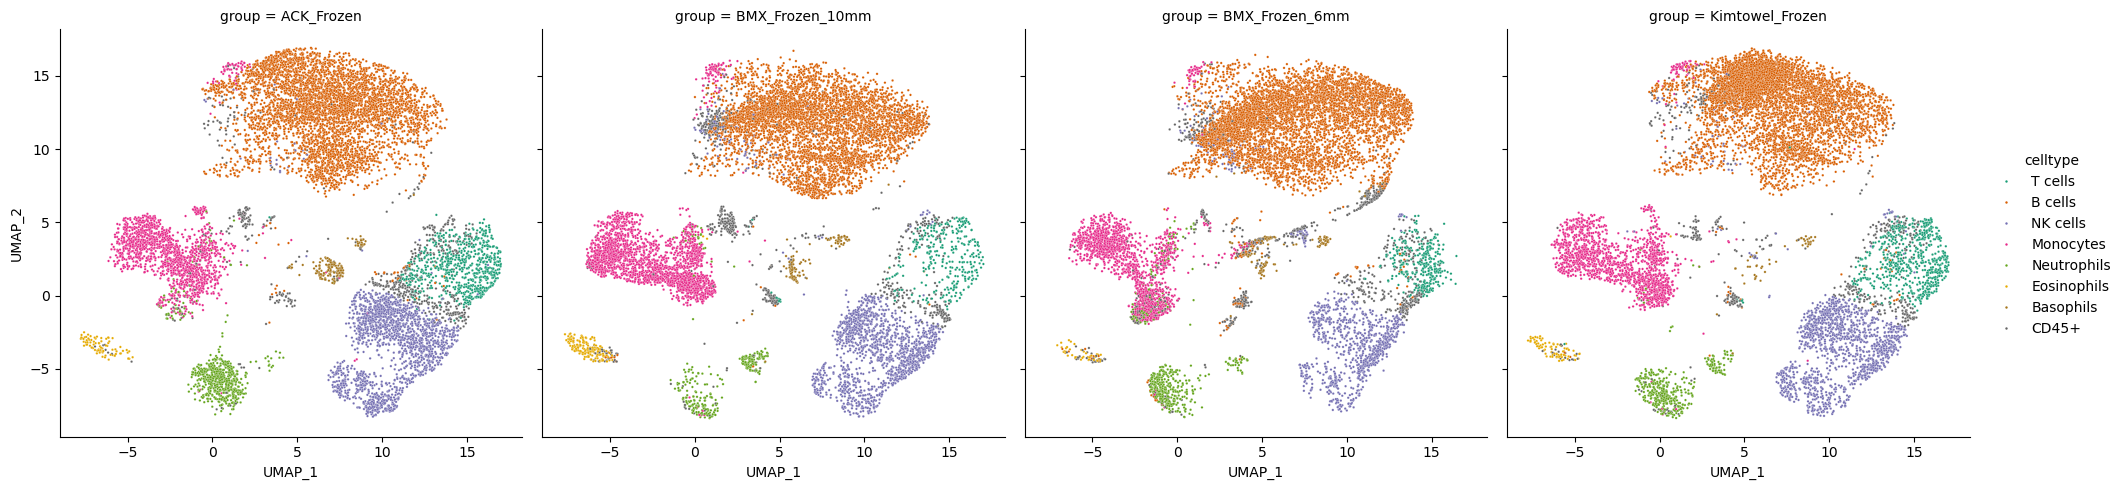

In [11]:
palette = {"T cells":"#1B9E77", 
           "B cells":"#D95F02", 
           "NK cells":"#7570B3", 
           "Monocytes":"#E7298A", 
           "Neutrophils":"#66A61E", 
           "Eosinophils":"#E6AB02", 
           "Basophils":"#A6761D",
           "CD45+":"#666666"}
hue_order = ["T cells", "B cells", "NK cells", "Monocytes", "Neutrophils", "Eosinophils", "Basophils", "CD45+"]
grid = sns.relplot(x="UMAP_1", y="UMAP_2", data=gdf, legend=True, palette=palette, s=3,
                   col="group", 
                   hue="celltype", hue_order=hue_order)
grid.savefig(dir_result+'facet_umap2d_MinDist_0.4_Nneighbors_25_celltype.pdf')
plt.show()

## Clustering

In [12]:
df.columns

Index(['sample_id', 'group', 'celltype', 'FSC-A', 'SSC-A', 'BUV395-A CD45',
       'BV421-A CD19', 'BV480-A CD11c', 'BV605-A CD115', 'BV650-A CD11b',
       'BV711-A Ly6G', 'BV786-A Ly6C', 'BB515-A NK1_1', 'BB700-A SIRPa',
       'APC-A Siglec F', 'R718-A MHCII', 'APC-Cy7-A CD3e', 'PE-Cy7-A FceR1',
       'UMAP_1', 'UMAP_2'],
      dtype='object')

In [13]:
df_ = df
df = df.drop(['sample_id', 'group', 'celltype', 'UMAP_1', 'UMAP_2'], axis=1)
df.head()

FSC-A     SSC-A  BUV395-A CD45  BV421-A CD19  BV480-A CD11c  \
0  1.159270 -0.310758       0.554464     -0.885931      -0.586110   
1  0.552696 -0.554620       0.404978      0.982606      -0.373935   
2  0.144962  0.620933       0.005066     -0.963884       1.158539   
3  0.962977  0.602806       0.328595     -2.117880       0.896117   
4 -0.051882 -0.462053      -0.048359      0.576256       0.517374   

   BV605-A CD115  BV650-A CD11b  BV711-A Ly6G  BV786-A Ly6C  BB515-A NK1_1  \
0      -0.210948       0.201151     -0.438512      1.778846       3.955103   
1      -0.602841      -0.593752     -0.702718     -0.617406      -0.481105   
2      -0.003496       1.895770      0.803198     -0.668707      -0.396832   
3       0.271379       2.600598      1.414766      2.025932      -0.308440   
4      -0.584280      -0.640670     -0.470462     -0.744477      -0.417993   

   BB700-A SIRPa  APC-A Siglec F  R718-A MHCII  APC-Cy7-A CD3e  PE-Cy7-A FceR1  
0      -0.560177       -0.046185     -1.057001       -1.017908       -0.743438  
1      -0.570641       -0.088153      0.449859       -0.656413       -0.541607  
2       1.737835       -0.626328     -1.184978       -0.344771        0.481023  
3       2.065333       -0.439502     -1.237550       -0.867201        0.836649  
4      -0.562773       -0.143216      0.218212       -0.174368       -0.650930

### K-Means

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x787cf8eec860>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/opt/conda

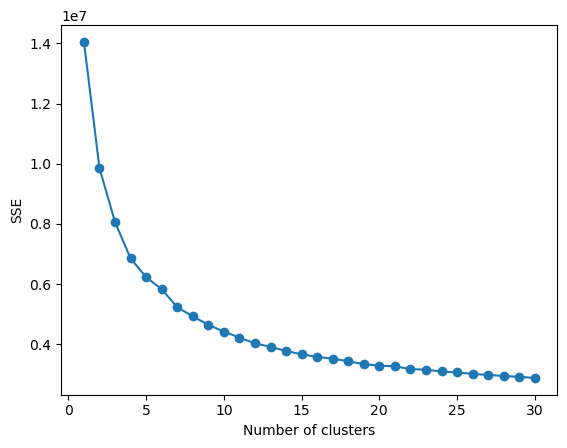

In [14]:
from sklearn.cluster import KMeans
list_sse = []

for i in range(1,30+1):
    km = KMeans(n_clusters=i,
               random_state=0, 
                init='k-means++')
    km.fit(df)
    list_sse.append(km.inertia_)

plt.plot(range(1,30+1), list_sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

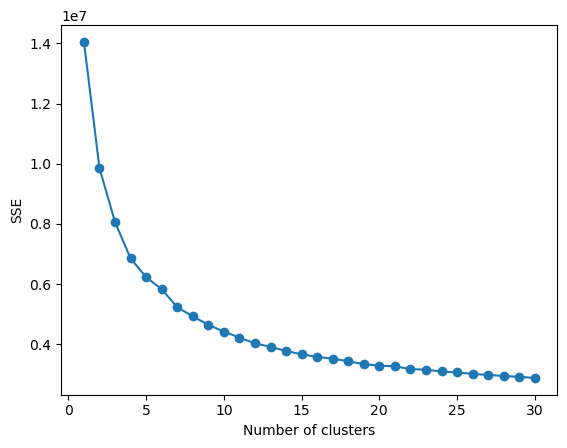

In [15]:
plt.plot(range(1,30+1), list_sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.savefig(dir_result+'Kmeans_sse.pdf')
plt.show()

In [16]:
# K-Means
from sklearn.cluster import KMeans
for n_clusters in range(5, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, init='k-means++')
    kmeans.fit(df)
    pred_Kmeans = kmeans.predict(df)
    df_['kmeans_'+str(n_clusters)] = pred_Kmeans
    df_['kmeans_'+str(n_clusters)] = df_['kmeans_'+str(n_clusters)].astype('object')

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x787ce2243ec0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/opt/conda

In [17]:
df_

sample_id            group  \
0       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
1       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
2       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
3       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
4       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
...                                                ...              ...   
936523    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936524    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936525    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936526    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936527    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   

         celltype     FSC-A     SSC-A  BUV395-A CD45  BV421-A CD19  \
0        NK cells  1.159270 -0.310758       0.554464     -0.885931   
1         B cells  0.552696 -0.554620       0.404978      0.982606   
2       Monocytes  0.144962  0.620933       0.005066     -0.963884   
3       Monocytes  0.962977  0.602806       0.328595     -2.117880   
4         B cells -0.051882 -0.462053      -0.048359      0.576256   
...           ...       ...       ...            ...           ...   
936523    T cells  0.067342 -0.074442       1.135650     -1.171773   
936524    B cells -1.261230 -0.579225       0.211795      0.620007   
936525      CD45+ -1.386644 -0.681121       0.265144      0.567288   
936526    B cells  0.778288 -0.649725      -0.234511      0.627319   
936527  Monocytes  1.123439  0.588791       0.474938     -0.714092   

        BV480-A CD11c  BV605-A CD115  BV650-A CD11b  ...  APC-Cy7-A CD3e  \
0           -0.586110      -0.210948       0.201151  ...       -1.017908   
1           -0.373935      -0.602841      -0.593752  ...       -0.656413   
2            1.158539      -0.003496       1.895770  ...       -0.344771   
3            0.896117       0.271379       2.600598  ...       -0.867201   
4            0.517374      -0.584280      -0.640670  ...       -0.174368   
...               ...            ...            ...  ...             ...   
936523      -0.800425      -0.398844      -0.575612  ...        1.891037   
936524       0.258104      -0.414376      -0.669610  ...       -0.951960   
936525       0.530936       0.044337      -0.737017  ...        3.183791   
936526      -0.945489      -0.544970      -0.624735  ...       -0.165381   
936527      -0.780748       2.566993       1.827733  ...        1.304445   

        PE-Cy7-A FceR1     UMAP_1     UMAP_2  kmeans_5  kmeans_6  kmeans_7  \
0            -0.743438   7.688066  -6.372326         1         4         4   
1            -0.541607   6.353627  16.558071         2         0         3   
2             0.481023  -3.882151   4.113312         3         3         2   
3             0.836649  -2.186766   1.211595         3         3         2   
4            -0.650930   9.018615  12.735517         2         0         3   
...                ...        ...        ...       ...       ...       ...   
936523       -0.384270  12.245542   1.441535         1         1         1   
936524       -0.272384   6.596967   9.754209         2         0         3   
936525        0.395124  12.944637   4.719583         1         1         1   
936526       -0.506730   8.324241  15.935181         2         0         3   
936527        0.069056  -0.146475   2.733565         3         3         2   

        kmeans_8  kmeans_9  kmeans_10  
0              2         2          0  
1              0         3          1  
2              7         1          2  
3              1         6          6  
4              0         0          5  
...          ...       ...        ...  
936523         4         8          8  
936524         0         0          5  
936525         4         8          8  
936526         0         3          1  
936527       

## Visualization of UMAP

In [18]:
pref_list = []
for n_clusters in range(5, 11): 
    pref_list.append('kmeans_'+str(n_clusters))
    
print(pref_list)

['kmeans_5', 'kmeans_6', 'kmeans_7', 'kmeans_8', 'kmeans_9', 'kmeans_10']


In [19]:
df_l = df_.melt(id_vars=['UMAP_1', 'UMAP_2'], value_vars=pref_list, var_name='n_clusters', value_name='label')
df_l

UMAP_1     UMAP_2 n_clusters label
0         7.688066  -6.372326   kmeans_5     1
1         6.353627  16.558071   kmeans_5     2
2        -3.882151   4.113312   kmeans_5     3
3        -2.186766   1.211595   kmeans_5     3
4         9.018615  12.735517   kmeans_5     2
...            ...        ...        ...   ...
5619163  12.245542   1.441535  kmeans_10     8
5619164   6.596967   9.754209  kmeans_10     5
5619165  12.944637   4.719583  kmeans_10     8
5619166   8.324241  15.935181  kmeans_10     1
5619167  -0.146475   2.733565  kmeans_10     6

[5619168 rows x 4 columns]

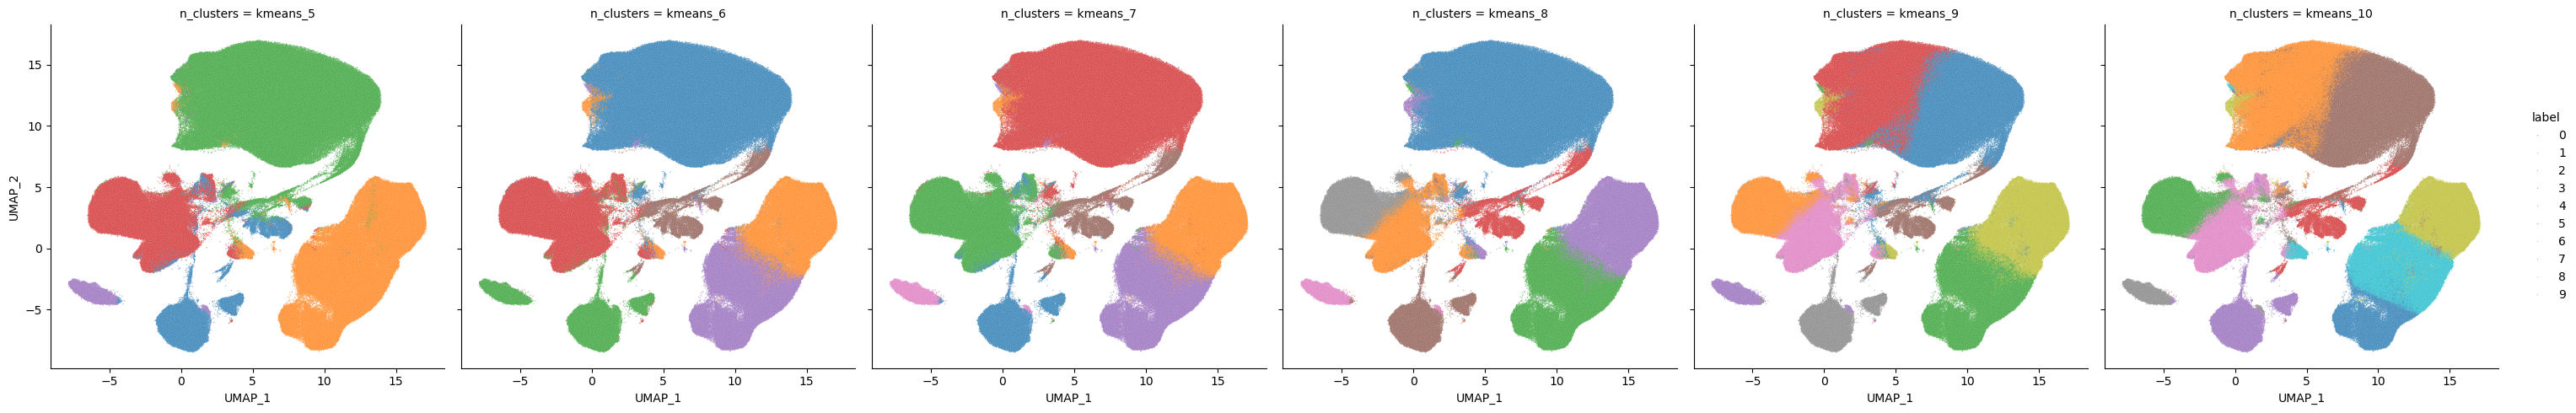

In [20]:
sns.relplot(x='UMAP_1', 
            y='UMAP_2', 
            hue='label', 
            col="n_clusters", 
            data=df_l, 
            s=1, 
            alpha=0.5,
            palette=sns.color_palette('tab10',10))
plt.show()

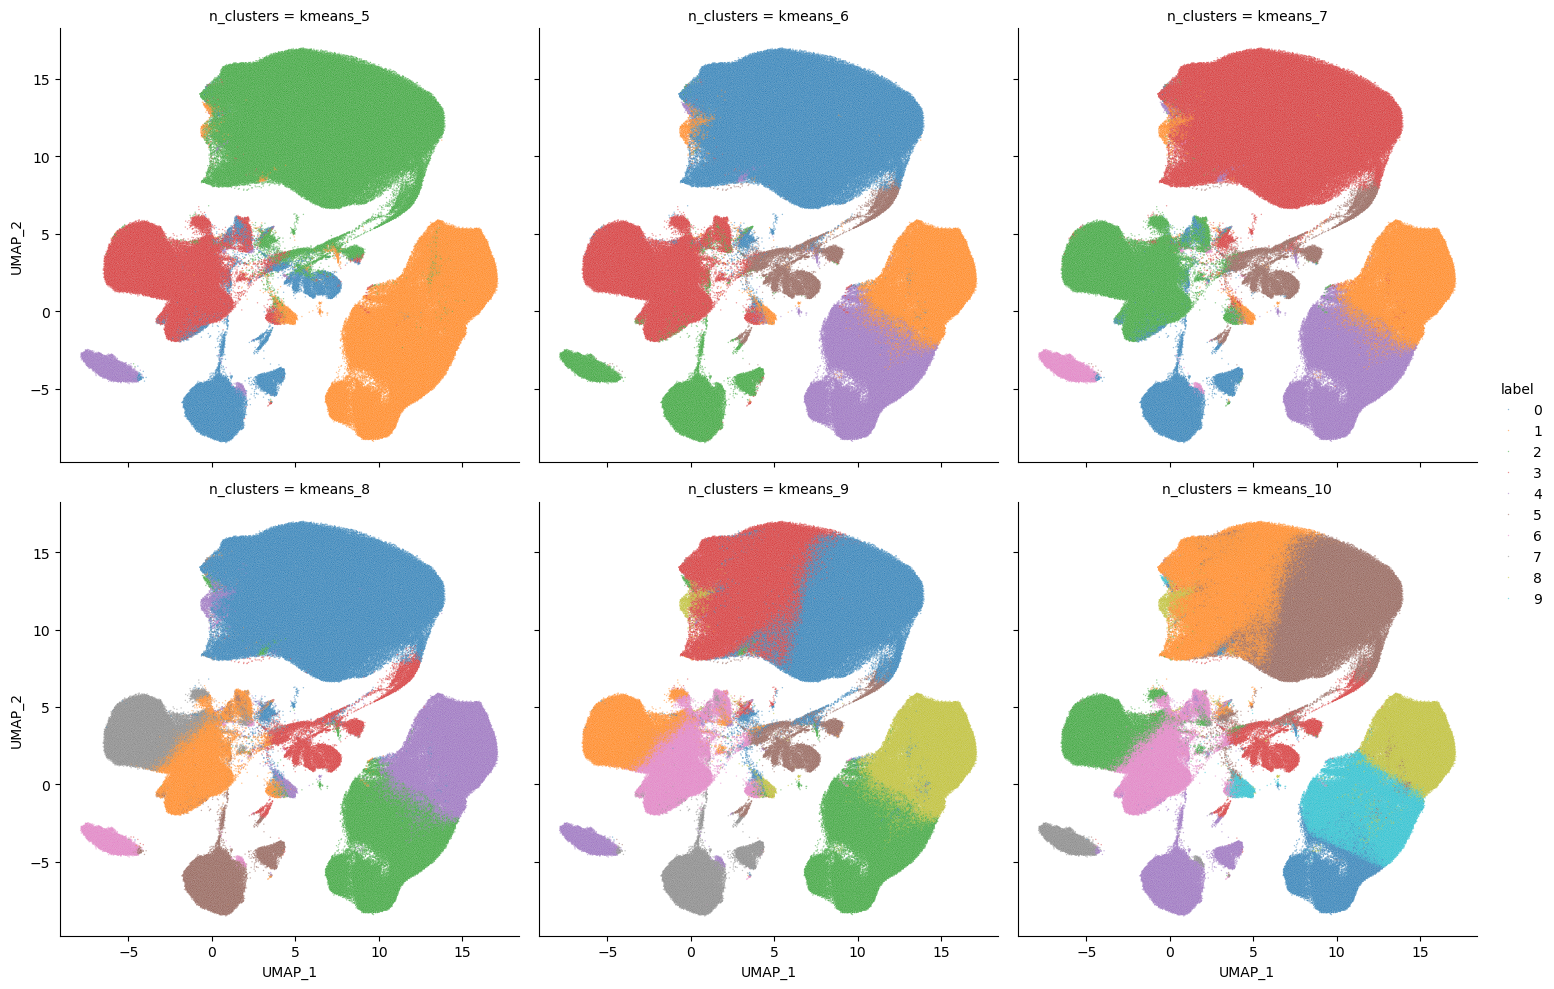

In [21]:
sns.relplot(x='UMAP_1', 
            y='UMAP_2', 
            hue='label', 
            col="n_clusters", 
            col_wrap=3,
            data=df_l, 
            s=1, 
            alpha=0.5,
            palette=sns.color_palette('tab10',10))
plt.show()

## Visualization of each expression profile

In [22]:
df_

sample_id            group  \
0       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
1       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
2       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
3       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
4       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
...                                                ...              ...   
936523    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936524    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936525    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936526    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936527    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   

         celltype     FSC-A     SSC-A  BUV395-A CD45  BV421-A CD19  \
0        NK cells  1.159270 -0.310758       0.554464     -0.885931   
1         B cells  0.552696 -0.554620       0.404978      0.982606   
2       Monocytes  0.144962  0.620933       0.005066     -0.963884   
3       Monocytes  0.962977  0.602806       0.328595     -2.117880   
4         B cells -0.051882 -0.462053      -0.048359      0.576256   
...           ...       ...       ...            ...           ...   
936523    T cells  0.067342 -0.074442       1.135650     -1.171773   
936524    B cells -1.261230 -0.579225       0.211795      0.620007   
936525      CD45+ -1.386644 -0.681121       0.265144      0.567288   
936526    B cells  0.778288 -0.649725      -0.234511      0.627319   
936527  Monocytes  1.123439  0.588791       0.474938     -0.714092   

        BV480-A CD11c  BV605-A CD115  BV650-A CD11b  ...  APC-Cy7-A CD3e  \
0           -0.586110      -0.210948       0.201151  ...       -1.017908   
1           -0.373935      -0.602841      -0.593752  ...       -0.656413   
2            1.158539      -0.003496       1.895770  ...       -0.344771   
3            0.896117       0.271379       2.600598  ...       -0.867201   
4            0.517374      -0.584280      -0.640670  ...       -0.174368   
...               ...            ...            ...  ...             ...   
936523      -0.800425      -0.398844      -0.575612  ...        1.891037   
936524       0.258104      -0.414376      -0.669610  ...       -0.951960   
936525       0.530936       0.044337      -0.737017  ...        3.183791   
936526      -0.945489      -0.544970      -0.624735  ...       -0.165381   
936527      -0.780748       2.566993       1.827733  ...        1.304445   

        PE-Cy7-A FceR1     UMAP_1     UMAP_2  kmeans_5  kmeans_6  kmeans_7  \
0            -0.743438   7.688066  -6.372326         1         4         4   
1            -0.541607   6.353627  16.558071         2         0         3   
2             0.481023  -3.882151   4.113312         3         3         2   
3             0.836649  -2.186766   1.211595         3         3         2   
4            -0.650930   9.018615  12.735517         2         0         3   
...                ...        ...        ...       ...       ...       ...   
936523       -0.384270  12.245542   1.441535         1         1         1   
936524       -0.272384   6.596967   9.754209         2         0         3   
936525        0.395124  12.944637   4.719583         1         1         1   
936526       -0.506730   8.324241  15.935181         2         0         3   
936527        0.069056  -0.146475   2.733565         3         3         2   

        kmeans_8  kmeans_9  kmeans_10  
0              2         2          0  
1              0         3          1  
2              7         1          2  
3              1         6          6  
4              0         0          5  
...          ...       ...        ...  
936523         4         8          8  
936524         0         0          5  
936525         4         8          8  
936526         0         3          1  
936527       

In [23]:
protein_list = ["APC-A Siglec F", "APC-Cy7-A CD3e", "BB515-A NK1_1", "BB700-A SIRPa", "BUV395-A CD45", "BV421-A CD19", "BV480-A CD11c", "BV605-A CD115", "BV650-A CD11b", "BV711-A Ly6G", "BV786-A Ly6C", "FSC-A", "PE-Cy7-A FceR1", "R718-A MHCII", "SSC-A"]
cluster_list = ['kmeans_5', 'kmeans_6', 'kmeans_7', 'kmeans_8', 'kmeans_9', 'kmeans_10']

In [24]:
df_e = df_.melt(id_vars=cluster_list, value_vars=protein_list, var_name='protein', value_name='expression')
df_e

kmeans_5 kmeans_6 kmeans_7 kmeans_8 kmeans_9 kmeans_10  \
0               1        4        4        2        2         0   
1               2        0        3        0        3         1   
2               3        3        2        7        1         2   
3               3        3        2        1        6         6   
4               2        0        3        0        0         5   
...           ...      ...      ...      ...      ...       ...   
14047915        1        1        1        4        8         8   
14047916        2        0        3        0        0         5   
14047917        1        1        1        4        8         8   
14047918        2        0        3        0        3         1   
14047919        3        3        2        1        6         6   

                 protein  expression  
0         APC-A Siglec F   -0.046185  
1         APC-A Siglec F   -0.088153  
2         APC-A Siglec F   -0.626328  
3         APC-A Siglec F   -0.439502  
4         APC-A Siglec F   -0.143216  
...                  ...         ...  
14047915           SSC-A   -0.074442  
14047916           SSC-A   -0.579225  
14047917           SSC-A   -0.681121  
14047918           SSC-A   -0.649725  
14047919           SSC-A    0.588791  

[14047920 rows x 8 columns]

In [25]:
df_e = df_e.melt(id_vars=['protein', 'expression'], value_vars=cluster_list, var_name='n_clusters', value_name='label')
df_e

protein  expression n_clusters label
0         APC-A Siglec F   -0.046185   kmeans_5     1
1         APC-A Siglec F   -0.088153   kmeans_5     2
2         APC-A Siglec F   -0.626328   kmeans_5     3
3         APC-A Siglec F   -0.439502   kmeans_5     3
4         APC-A Siglec F   -0.143216   kmeans_5     2
...                  ...         ...        ...   ...
84287515           SSC-A   -0.074442  kmeans_10     8
84287516           SSC-A   -0.579225  kmeans_10     5
84287517           SSC-A   -0.681121  kmeans_10     8
84287518           SSC-A   -0.649725  kmeans_10     1
84287519           SSC-A    0.588791  kmeans_10     6

[84287520 rows x 4 columns]

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


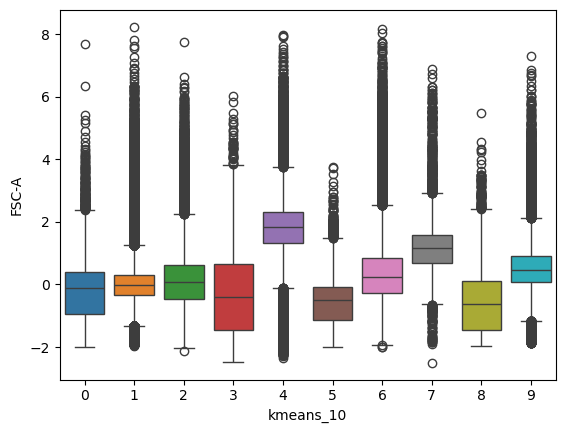

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


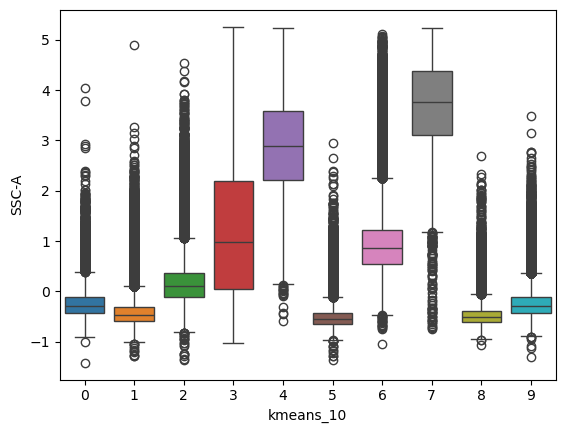

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


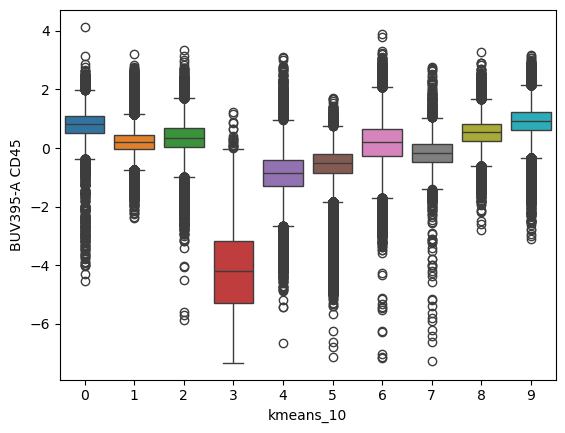

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


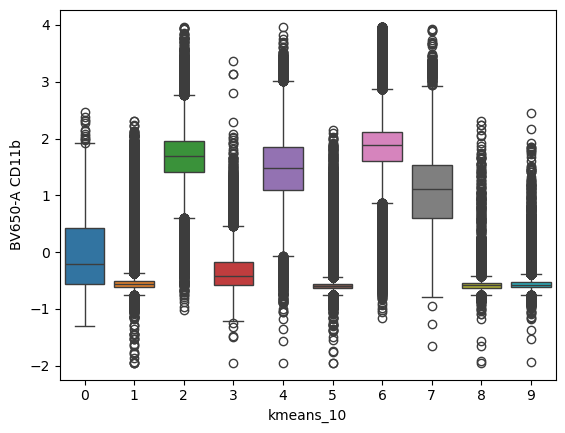

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


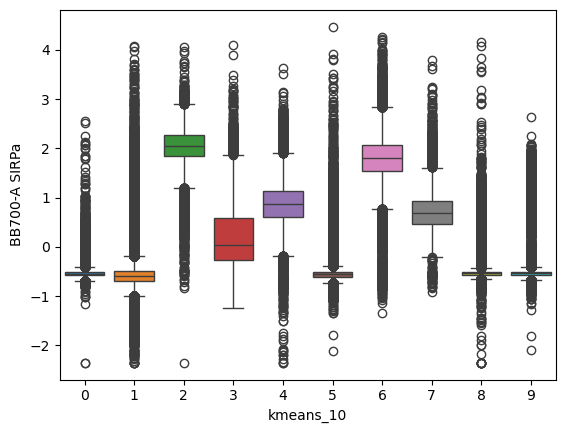

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


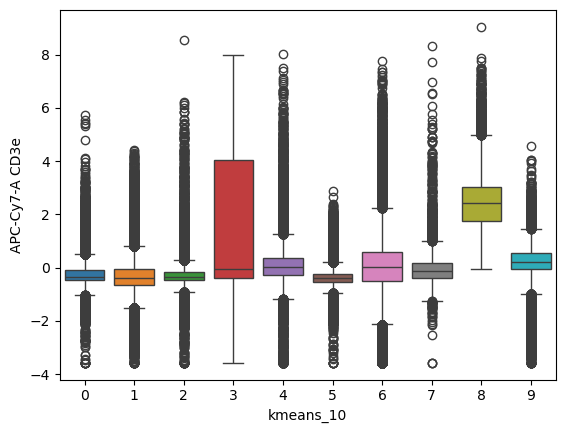

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


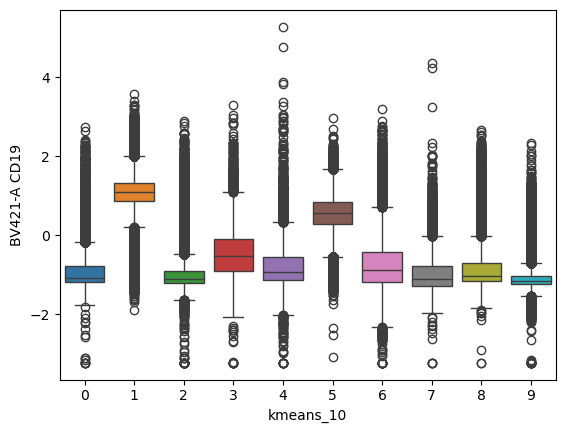

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


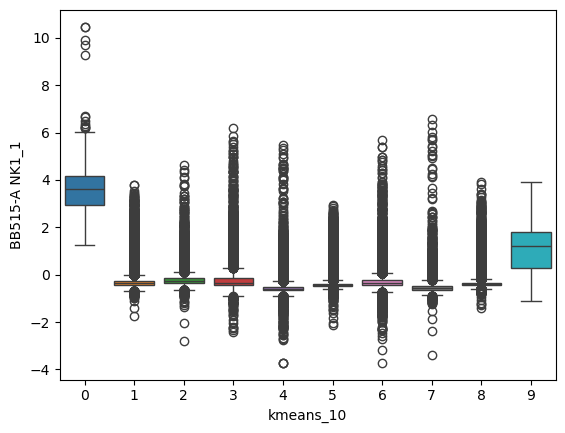

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


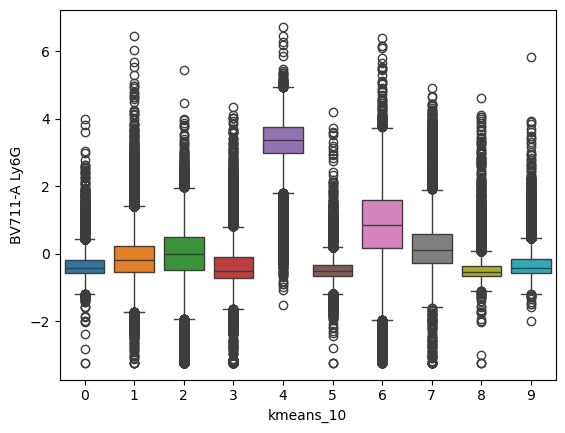

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


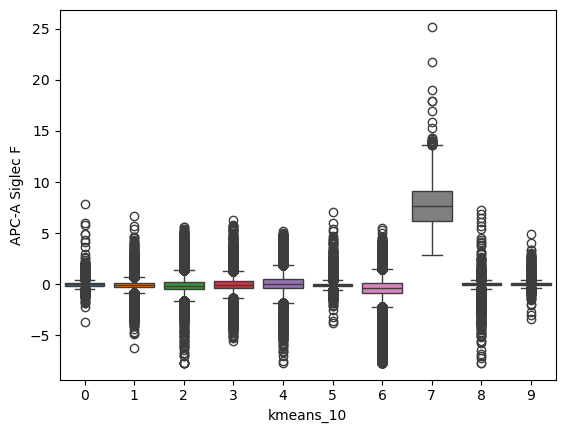

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


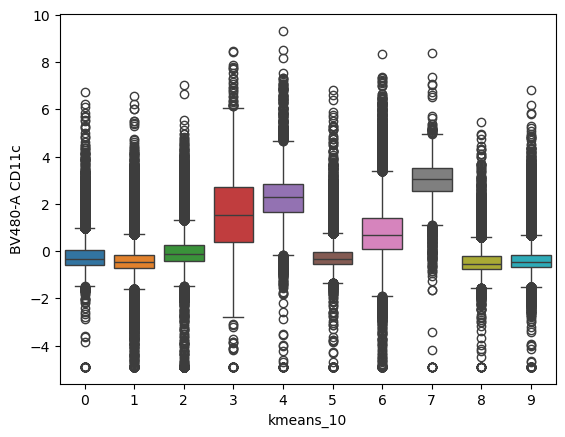

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


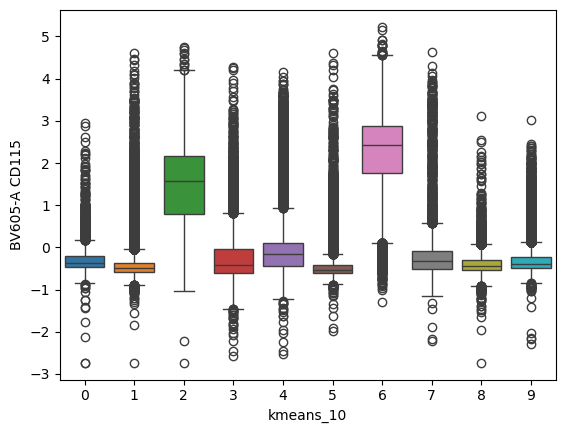

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


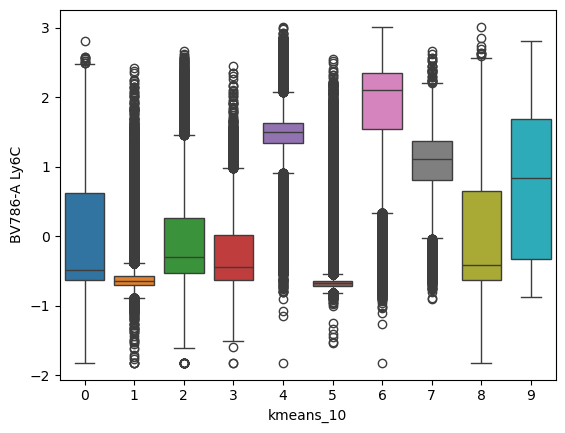

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


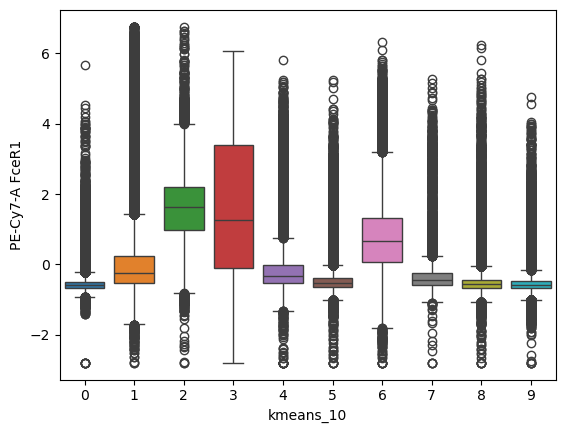

/tmp/ipykernel_38645/3167861673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))


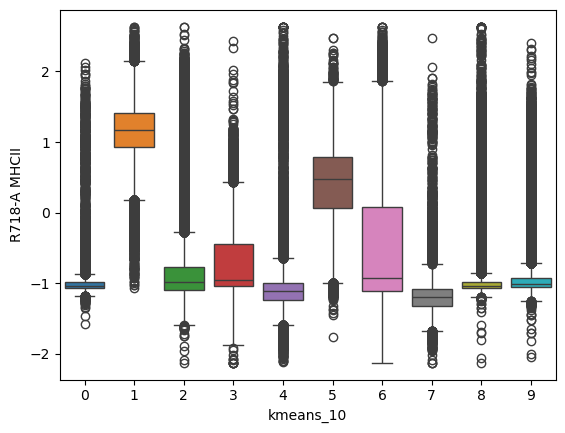

In [26]:
pref_list = ["FSC-A", "SSC-A", "BUV395-A CD45", "BV650-A CD11b", "BB700-A SIRPa", "APC-Cy7-A CD3e", "BV421-A CD19", "BB515-A NK1_1", "BV711-A Ly6G", "APC-A Siglec F", "BV480-A CD11c", "BV605-A CD115", "BV786-A Ly6C", "PE-Cy7-A FceR1", "R718-A MHCII"]
for pref in pref_list:
    sns.boxplot(x = "kmeans_10", y = pref, data = df_, palette=sns.color_palette('tab10',10))
    plt.savefig(dir_result+pref+'.pdf')
    plt.show()

In [27]:
df_

sample_id            group  \
0       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
1       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
2       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
3       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
4       231218_Symphony_016_ACK_231212_2311218_ACK.fcs       ACK_Frozen   
...                                                ...              ...   
936523    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936524    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936525    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936526    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   
936527    231225_Symphony_021_ACK_231219_231225_60.fcs  Kimtowel_Frozen   

         celltype     FSC-A     SSC-A  BUV395-A CD45  BV421-A CD19  \
0        NK cells  1.159270 -0.310758       0.554464     -0.885931   
1         B cells  0.552696 -0.554620       0.404978      0.982606   
2       Monocytes  0.144962  0.620933       0.005066     -0.963884   
3       Monocytes  0.962977  0.602806       0.328595     -2.117880   
4         B cells -0.051882 -0.462053      -0.048359      0.576256   
...           ...       ...       ...            ...           ...   
936523    T cells  0.067342 -0.074442       1.135650     -1.171773   
936524    B cells -1.261230 -0.579225       0.211795      0.620007   
936525      CD45+ -1.386644 -0.681121       0.265144      0.567288   
936526    B cells  0.778288 -0.649725      -0.234511      0.627319   
936527  Monocytes  1.123439  0.588791       0.474938     -0.714092   

        BV480-A CD11c  BV605-A CD115  BV650-A CD11b  ...  APC-Cy7-A CD3e  \
0           -0.586110      -0.210948       0.201151  ...       -1.017908   
1           -0.373935      -0.602841      -0.593752  ...       -0.656413   
2            1.158539      -0.003496       1.895770  ...       -0.344771   
3            0.896117       0.271379       2.600598  ...       -0.867201   
4            0.517374      -0.584280      -0.640670  ...       -0.174368   
...               ...            ...            ...  ...             ...   
936523      -0.800425      -0.398844      -0.575612  ...        1.891037   
936524       0.258104      -0.414376      -0.669610  ...       -0.951960   
936525       0.530936       0.044337      -0.737017  ...        3.183791   
936526      -0.945489      -0.544970      -0.624735  ...       -0.165381   
936527      -0.780748       2.566993       1.827733  ...        1.304445   

        PE-Cy7-A FceR1     UMAP_1     UMAP_2  kmeans_5  kmeans_6  kmeans_7  \
0            -0.743438   7.688066  -6.372326         1         4         4   
1            -0.541607   6.353627  16.558071         2         0         3   
2             0.481023  -3.882151   4.113312         3         3         2   
3             0.836649  -2.186766   1.211595         3         3         2   
4            -0.650930   9.018615  12.735517         2         0         3   
...                ...        ...        ...       ...       ...       ...   
936523       -0.384270  12.245542   1.441535         1         1         1   
936524       -0.272384   6.596967   9.754209         2         0         3   
936525        0.395124  12.944637   4.719583         1         1         1   
936526       -0.506730   8.324241  15.935181         2         0         3   
936527        0.069056  -0.146475   2.733565         3         3         2   

        kmeans_8  kmeans_9  kmeans_10  
0              2         2          0  
1              0         3          1  
2              7         1          2  
3              1         6          6  
4              0         0          5  
...          ...       ...        ...  
936523         4         8          8  
936524         0         0          5  
936525         4         8          8  
936526         0         3          1  
936527       

In [28]:
df_.to_csv(dir_result+'df_clustering.csv', index=False)

## Visualization of the K-Means 10 clusters UMAP 

In [29]:
gdf = df_.groupby('group')
gdf = gdf.apply(lambda x: x.sample(n=10000, random_state=42))
gdf

sample_id  \
group                                                                       
ACK_Frozen      107935      231225_Symphony_026_ACK_231219_231225_ACK.fcs   
                88086       231225_Symphony_026_ACK_231219_231225_ACK.fcs   
                107466      231225_Symphony_026_ACK_231219_231225_ACK.fcs   
                259036  240126_Symphony_044_BMX_240123_240126_2_ACK_00...   
                63189       231225_Symphony_026_ACK_231219_231225_ACK.fcs   
...                                                                   ...   
Kimtowel_Frozen 899921       231225_Symphony_021_ACK_231219_231225_60.fcs   
                723059       231211_Symphony_002_ACK_231208_231211_60.fcs   
                921063       231225_Symphony_021_ACK_231219_231225_60.fcs   
                713107       231211_Symphony_002_ACK_231208_231211_60.fcs   
                892658       231225_Symphony_021_ACK_231219_231225_60.fcs   

                                  group     celltype     FSC-A     SSC-A  \
group                                                                      
ACK_Frozen      107935       ACK_Frozen    Monocytes -0.962864 -0.070462   
                88086        ACK_Frozen    Basophils  1.808583  4.997831   
                107466       ACK_Frozen      B cells  0.536869 -0.543556   
                259036       ACK_Frozen    Monocytes  0.507927 -0.179781   
                63189        ACK_Frozen    Monocytes  2.904175  1.533984   
...                                 ...          ...       ...       ...   
Kimtowel_Frozen 899921  Kimtowel_Frozen    Monocytes  1.040589  0.712406   
                723059  Kimtowel_Frozen      B cells -0.057253 -0.586911   
                921063  Kimtowel_Frozen      B cells  0.055751 -0.642737   
                713107  Kimtowel_Frozen  Eosinophils -0.084642  3.661448   
                892658  Kimtowel_Frozen    Monocytes  1.351261  0.286427   

                        BUV395-A CD45  BV421-A CD19  BV480-A CD11c  \
group                                                                
ACK_Frozen      107935       0.528470     -1.155537      -0.373886   
                88086       -3.081412      0.668165       4.593247   
                107466       0.365406      0.616670      -0.594705   
                259036       1.120876     -0.893056      -1.356806   
                63189        1.656268      0.747860       1.111029   
...                               ...           ...            ...   
Kimtowel_Frozen 899921       0.802308     -0.884732      -0.425735   
                723059      -1.127362      0.382435      -0.585038   
                921063       0.097075      0.717036      -1.183078   
                713107       0.113056     -0.947173       2.268976   
                892658       0.262203      2.309808       0.228038   

                        BV605-A CD115  BV650-A CD11b  ...  APC-Cy7-A CD3e  \
group                                                 ...                   
ACK_Frozen      107935       1.017902       1.454483  ...       -0.223824   
                88086       -0.466619      -0.587185  ...        6.567382   
                107466      -0.626743      -0.525809  ...       -1.004707   
                259036       1.953208       2.400164  ...        0.797629   
                63189        0.835351       2.164346  ...        0.103378   
...                               ...            ...  ...             ...   
Kimtowel_Frozen 899921       2.855206       2.089682  ...        1.852211   
                723059      -0.596269      -0.621819  ...       -0.191507   
                921063      -0.756237      -0.541298  ...       -1.107552   
                713107       0.000808       1.294389  ...       -0.037087   
                892658      -0.488361       1.638896  ...       -1.050587   

                        PE-Cy7-A FceR1    UMAP_1     UMAP_2  kmeans_5  \
group                                                                   
ACK_Frozen    

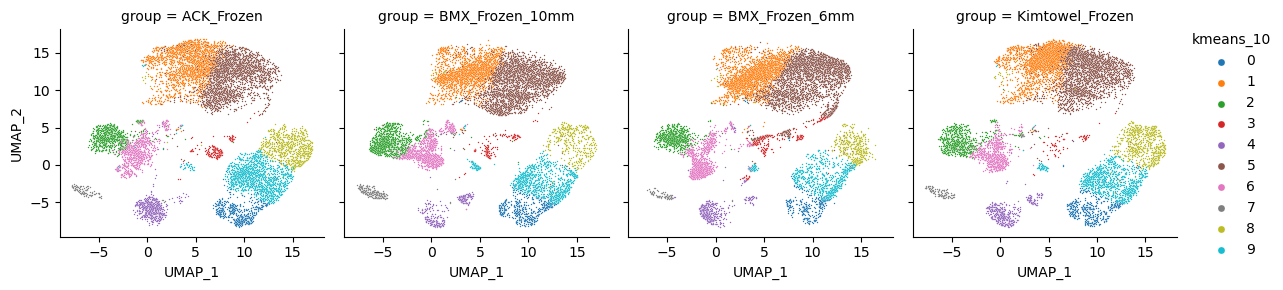

In [30]:
g = sns.FacetGrid(gdf, col="group", hue="kmeans_10", palette=sns.color_palette('tab10',10))
g.map_dataframe(sns.scatterplot, x="UMAP_1", y="UMAP_2", s=1)
g.add_legend(markerscale=5)
g.savefig(dir_result+'facet_umap2d_MinDist_0.4_Nneighbors_25_Kmeans_10.pdf', dpi=360)
plt.show()